In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
path = f"C:/Users/pablo/OneDrive/Documentos/GitHub/MDS-Notebooks/02-VdI/prodagosto2022.xlsx"
frame = pd.read_excel(path)

In [9]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


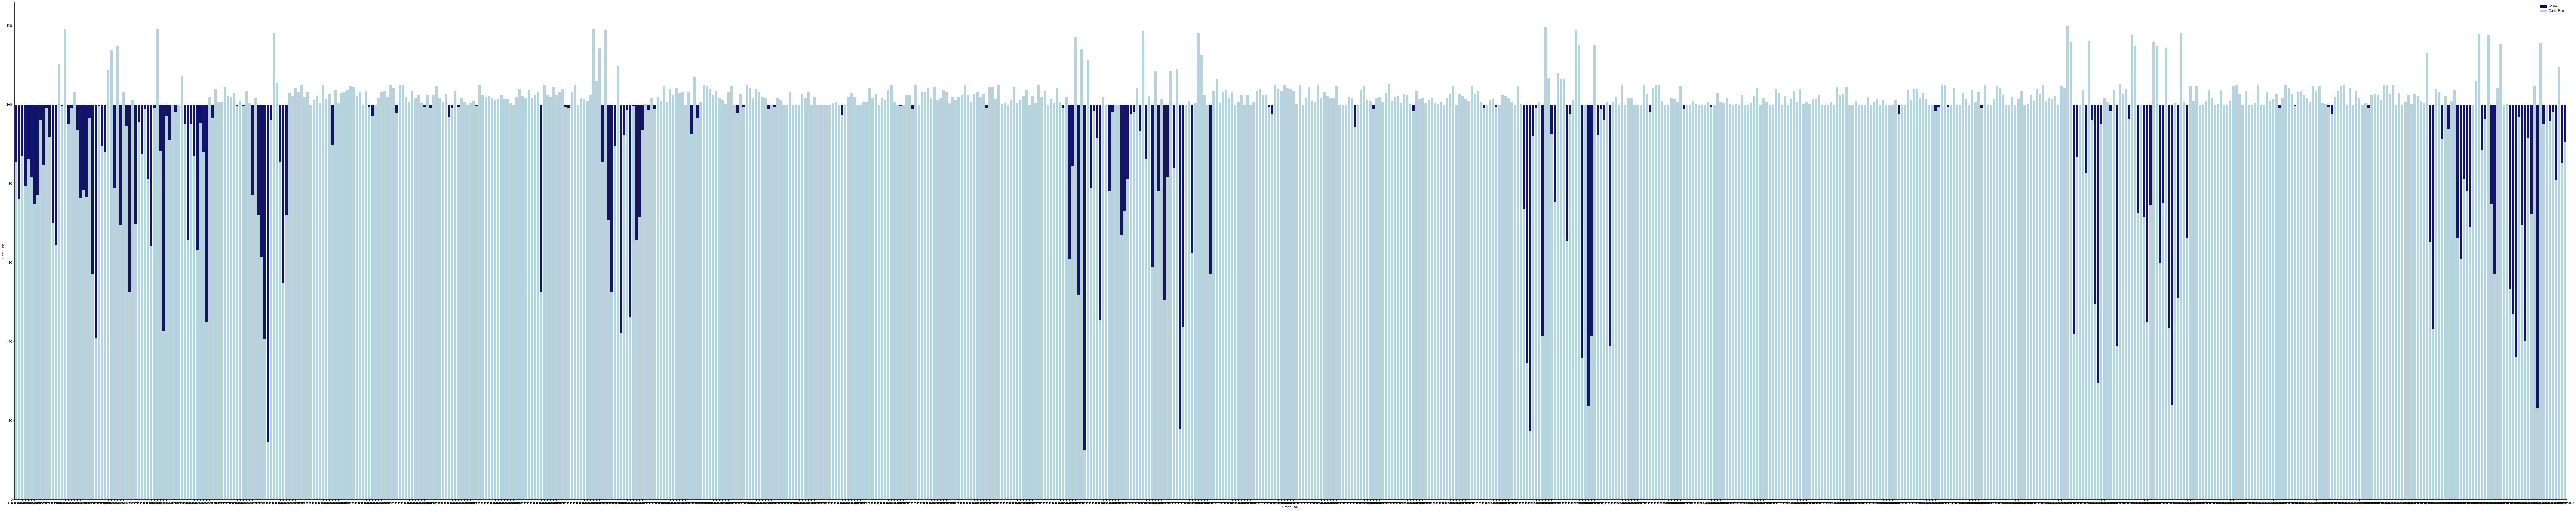

In [12]:
# set the figure size
plt.figure(figsize=(150, 30))

# from raw value to percentage
total = frame.groupby('Orden Fab.')['Cantidad OF'].mean().reset_index()
piso = frame.groupby('Orden Fab.')['Cant. Piso'].mean().reset_index()
piso['Cant. Piso'] = [i / j * 100 for i,j in zip(piso['Cant. Piso'], total['Cantidad OF'])]
total['Cantidad OF'] = [i / j * 100 for i,j in zip(total['Cantidad OF'], total['Cantidad OF'])]

# bar chart 1 -> top bars (group of "Cantidad OF")
bar1 = sns.barplot(x="Orden Fab.",  y="Cantidad OF", data=total, color='darkblue')
#bar1 = sns.barplot(y="Orden Fab.",  x="Cantidad OF", data=total, color='darkblue')
# bar chart 2 -> bottom bars (group of 'Cant. Piso'
bar2 = sns.barplot(x="Orden Fab.", y='Cant. Piso', data=piso, color='lightblue')
#bar2 = sns.barplot(y="Orden Fab.", x='Cant. Piso', data=piso, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Saldo')
bottom_bar = mpatches.Patch(color='lightblue', label='Cant. Piso')
plt.legend(handles=[top_bar, bottom_bar])


# show the graph
plt.show()
pass

In [13]:
a = frame.groupby('Orden Fab.')['Cantidad OF','Cant. Piso'].mean().reset_index()

C:\Users\pablo\AppData\Local\Temp\ipykernel_23300\1740427303.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = frame.groupby('Orden Fab.')['Cantidad OF','Cant. Piso'].mean().reset_index()


In [14]:
def porcentaje (cantof, cantpiso):
    porcentaje = cantpiso/cantof*100
    return porcentaje
a['Porcentaje de cumplimiento']=a[['Cantidad OF','Cant. Piso']].apply(lambda x : porcentaje(*x), axis=1)
a

,Orden Fab.,Cantidad OF,Cant. Piso,Porcentaje de cumplimiento
0,110132446,80000.0,68360.0,85.450000
1,110134256,1120000.0,850862.0,75.969821
2,110134327,220000.0,191163.0,86.892273
3,110134504,385000.0,305689.0,79.399740
4,110135325,120000.0,103310.0,86.091667
...,...,...,...,...
826,119001045,1800.0,1767.0,98.166667
827,119001046,900.0,727.0,80.777778
828,119001055,691.0,756.0,109.406657
829,119001056,522.0,444.0,85.057471


In [15]:
porcentaje_ordenado=a.sort_values(by='Porcentaje de cumplimiento') #ver qué tan critica es la OF (tiempo paa cumplirla)
porcentaje_ordenado

,Orden Fab.,Cantidad OF,Cant. Piso,Porcentaje de cumplimiento
348,110138287,2400.0,298.0,12.416667
82,110137953,4500.0,657.0,14.600000
493,110138441,12000.0,2086.0,17.383333
379,110138327,5500.0,974.0,17.709091
821,119001020,52000.0,11986.0,23.050000
...,...,...,...,...
46,110137513,80000.0,95265.0,119.081250
188,110138095,52000.0,61955.0,119.144231
16,110136183,52000.0,61969.0,119.171154
498,110138446,20000.0,23940.0,119.700000


In [16]:
top10=porcentaje_ordenado.iloc[0:10]
top10=pd.DataFrame(top10)
top10

,Orden Fab.,Cantidad OF,Cant. Piso,Porcentaje de cumplimiento
348,110138287,2400.0,298.0,12.416667
82,110137953,4500.0,657.0,14.600000
493,110138441,12000.0,2086.0,17.383333
379,110138327,5500.0,974.0,17.709091
821,119001020,52000.0,11986.0,23.050000
512,110138462,16200.0,3854.0,23.790123
702,110138665,50000.0,11953.0,23.906000
678,110138635,3200.0,943.0,29.468750
492,110138440,6400.0,2217.0,34.640625
510,110138460,80000.0,28584.0,35.730000


In [ ]:
plt.figure(figsize=(10,10))
bar1 = sns.barplot(y="Orden Fab.",  x="Porcentaje de cumplimiento", data=top10, orient="h", order=top10['Orden Fab.'], color="#36a7e9")
plt.xlim(0,100)
plt.ylabel('Número de OF', fontsize=20)
plt.xlabel('Cumplimiento %', fontsize=20)
plt.grid(True, color = "#a1cdf2", linewidth = "2", linestyle = "-.", axis='x')
plt.show()


In [17]:
top10.set_index('Orden Fab.', inplace=True)

In [18]:
df_sorted = top10['Porcentaje de cumplimiento'].sort_values(ascending=False)

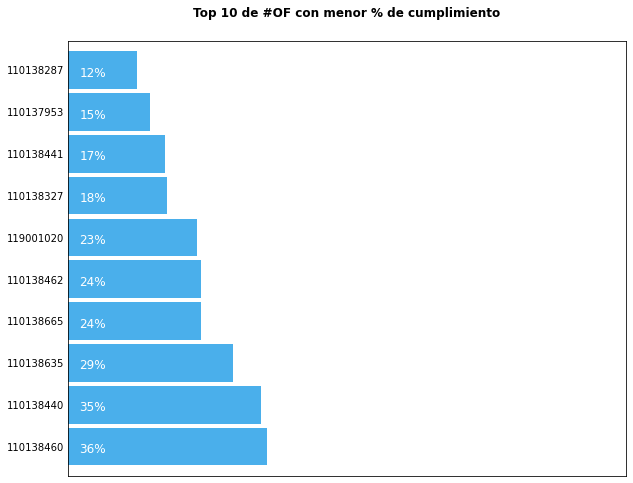

In [19]:
fontsize=12
colors = ["#36a7e9"]

ax = df_sorted.plot.barh(stacked=True, figsize=(10, 8), legend=False, width=0.9, alpha=0.9, xlim=(0, 100),
                        color=colors)

ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_ylabel('')
ax.set_title("Top 10 de #OF con menor % de cumplimiento", pad=24, fontweight=700)
ax.title.set_position([.5, 1])

ax.xaxis.set_ticks([])
for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 93
    ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1] + 0.3), color='white', fontsize=fontsize)

plt.show()